In [1]:
import numpy as np
import pandas as pd
from rsciio.phenom import file_reader
from scipy.ndimage import zoom
import hyperspy.api as hs
import matplotlib.pyplot as plt

In [2]:
filepath = '/home/sakshis/Matraca/Matraca/C2_10-12-2023/C2_10-12-2023.elid'

In [3]:
datasets = file_reader(filepath)

In [4]:
data_array = datasets

In [5]:
df = pd.DataFrame(data_array)

In [6]:
df.head()

,data,axes,metadata,original_metadata,mapping
0,"[[78, 64, 76, 63, 67, 67, 67, 68, 70, 73, 72, ...","[{'index_in_array': 0, 'name': 'y', 'offset': ...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...","[{'index_in_array': 0, 'name': 'y', 'offset': ...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
2,"[[79, 81, 71, 75, 65, 73, 76, 73, 107, 105, 85...","[{'index_in_array': 0, 'name': 'y', 'offset': ...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
3,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[{'index_in_array': 0, 'name': 'y', 'offset': ...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'name': 'Energy', 'offset': -0.0519479353680...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...


In [10]:
df.columns

Index(['data', 'axes', 'metadata', 'original_metadata', 'mapping'], dtype='object')

In [7]:
df['axes'][0]

[{'index_in_array': 0,
  'name': 'y',
  'offset': 0,
  'scale': 0.9005363769154936,
  'size': 600,
  'units': 'µm',
  'navigate': True},
 {'index_in_array': 1,
  'name': 'x',
  'offset': 0,
  'scale': 0.9005363769154936,
  'size': 960,
  'units': 'µm',
  'navigate': True}]

In [17]:
df.shape

(19, 5)

In [19]:
df.head(25)

,data,axes,metadata,original_metadata,mapping
0,"[[78, 64, 76, 63, 67, 67, 67, 68, 70, 73, 72, ...","[{'index_in_array': 0, 'name': 'y', 'offset': ...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...","[{'index_in_array': 0, 'name': 'y', 'offset': ...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
2,"[[79, 81, 71, 75, 65, 73, 76, 73, 107, 105, 85...","[{'index_in_array': 0, 'name': 'y', 'offset': ...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
3,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[{'index_in_array': 0, 'name': 'y', 'offset': ...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'name': 'Energy', 'offset': -0.0519479353680...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 196...","[{'name': 'Energy', 'offset': -0.0519479353680...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 179...","[{'name': 'Energy', 'offset': -0.0519479353680...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 215...","[{'name': 'Energy', 'offset': -0.0519479353680...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 220...","[{'name': 'Energy', 'offset': -0.0519479353680...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 215...","[{'name': 'Energy', 'offset': -0.0519479353680...",{'General': {'original_filename': 'C2_10-12-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...


In [131]:
df['axes'][4]

[{'name': 'Energy',
  'offset': -0.051947935368042875,
  'scale': 0.009814482345900658,
  'size': 2048,
  'units': 'keV',
  'navigate': False}]

In [142]:
x = df['axes'][4][0]['offset'] + np.arange(2048) * df['axes'][4][0]['scale']
x.shape

(2048,)

In [124]:
df['original_metadata'][0]

{'databarHeight': '0',
 'databarFields': '4091',
 'databarLabel': 'EFCO2',
 'displayWidth': '0.519',
 'pixelWidth': {'value': '900.5363769154935', 'unit': 'nm'},
 'pixelHeight': {'value': '900.5363769154935', 'unit': 'nm'},
 'time': '2023-10-12T17:54:27',
 'currentUser': None,
 'integrations': '4',
 'cropHint': {'left': '0', 'top': '0', 'right': '960', 'bottom': '600'},
 'samplePosition': {'x': '-0.006749380268', 'y': '-0.008024449422'},
 'multiStage': {'axis': {'value': '0.008017505875000022', 'id': 'Y'},
  'sampleRadius': {'value': '0', 'unit': 'm'},
  'sampleHeight': {'value': '0', 'unit': 'm'}},
 'appliedContrast': '0.8925619834710744',
 'appliedBrightness': '0.4156099794003204',
 'appliedGamma': '1',
 'displayBlackLevel': '0',
 'displayWhiteLevel': '1',
 'samplePressureEstimate': '60',
 'acquisition': {'scan': {'scanHW': 'ZYNQ',
   'acqHW': 'ZYNQ',
   'dwellTime': {'value': '200', 'unit': 'ns'},
   'spotSize': '5.1',
   'spotPresetName': 'Map',
   'rotation': '0',
   'interlace': 

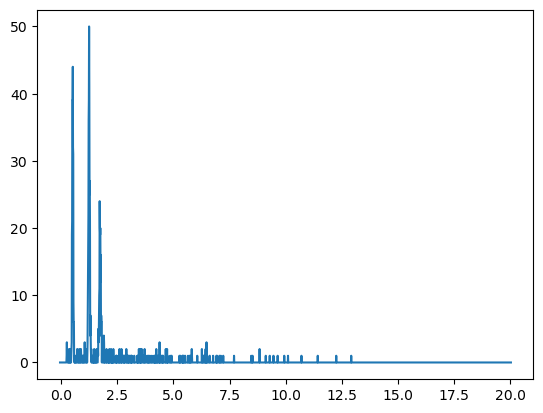

In [143]:
plt.plot(df['axes'][4][0]['offset'] + np.arange(2048) * df['axes'][4][0]['scale'], df['data'][4])
##Region data

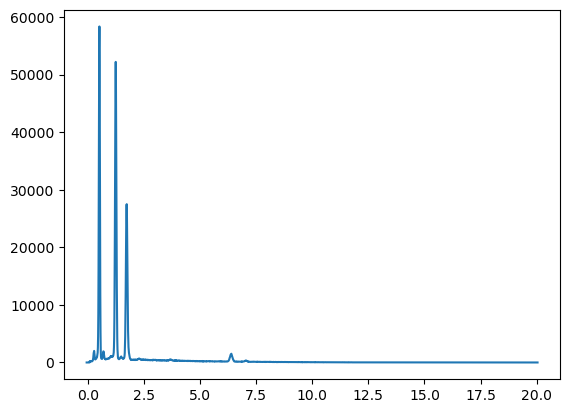

In [144]:
plt.plot(df['axes'][5][0]['offset'] + np.arange(2048) * df['axes'][5][0]['scale'], df['data'][5])

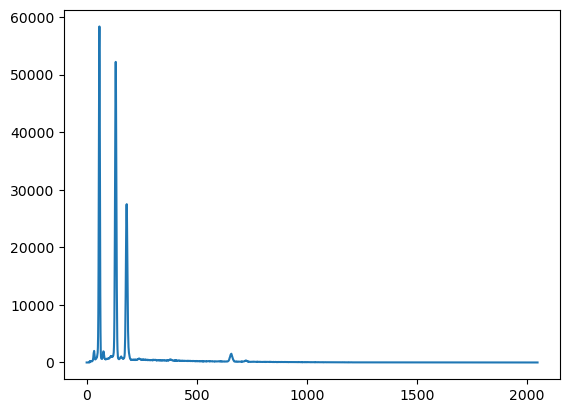

In [125]:
plt.plot(df['data'][5])
##

In [95]:
df['data'][1].shape

(80, 128, 2048)

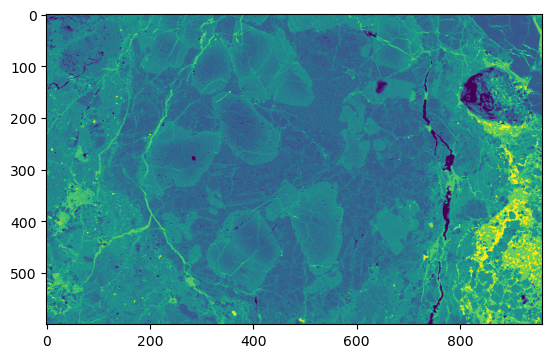

In [91]:
plt.imshow(df['data'][2])

In [110]:
df['data'][0].shape

(600, 960)

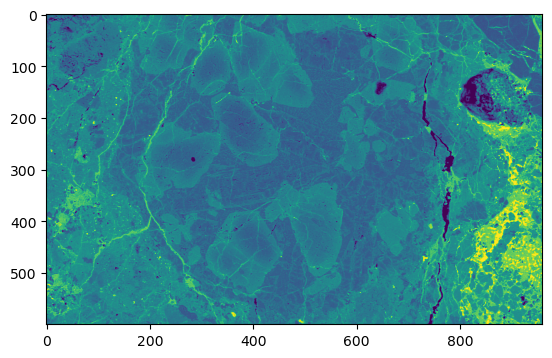

In [93]:
plt.imshow(df['data'][0])

In [97]:
df['data'][1].shape

(80, 128, 2048)

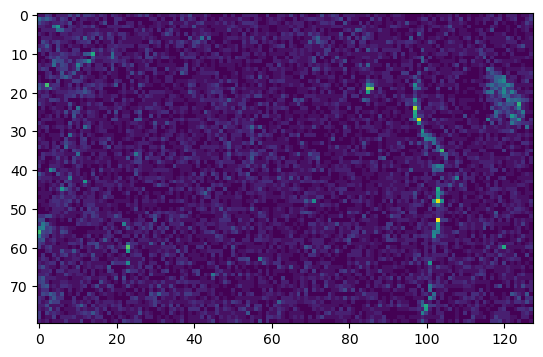

In [114]:
plt.imshow(df['data'][1][:,:,32])

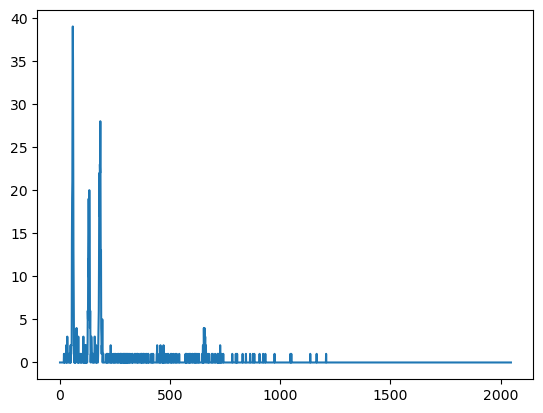

In [145]:
plt.plot(df['data'][1][0,4,:])

In [108]:
for i in range(2048):
    print(i, np.max(df['data'][1][:,:,i]))

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 3
15 4
16 3
17 3
18 3
19 3
20 3
21 3
22 3
23 4
24 3
25 4
26 3
27 4
28 7
29 9
30 16
31 19
32 23
33 24
34 29
35 24
36 16
37 7
38 7
39 5
40 4
41 4
42 7
43 5
44 6
45 5
46 6
47 6
48 5
49 6
50 8
51 8
52 12
53 16
54 24
55 34
56 53
57 62
58 71
59 60
60 44
61 36
62 19
63 12
64 7
65 8
66 7
67 7
68 8
69 7
70 6
71 7
72 10
73 11
74 12
75 13
76 15
77 14
78 15
79 10
80 9
81 8
82 6
83 5
84 4
85 6
86 7
87 5
88 5
89 6
90 6
91 5
92 5
93 7
94 5
95 4
96 4
97 4
98 4
99 7
100 5
101 5
102 4
103 5
104 5
105 6
106 7
107 9
108 11
109 11
110 15
111 12
112 12
113 9
114 8
115 7
116 6
117 6
118 5
119 4
120 4
121 6
122 5
123 6
124 6
125 8
126 12
127 16
128 26
129 31
130 38
131 43
132 46
133 43
134 37
135 30
136 25
137 17
138 13
139 9
140 6
141 6
142 5
143 6
144 4
145 5
146 5
147 6
148 5
149 6
150 8
151 12
152 12
153 14
154 16
155 20
156 19
157 16
158 14
159 14
160 10
161 9
162 8
163 6
164 7
165 4
166 5
167 5
168 5
169 5
170 5
171 6
172 6
173 8
174 9
175 1

In [63]:
for i in range(len(df)):
    print(df['data'][i].shape)

(600, 960)
(80, 128, 2048)
(600, 960)
(150, 240, 2048)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)


In [64]:
data_item = df['data'][4]

In [65]:
print(data_item)

[0 0 0 ... 0 0 0]


In [44]:
data_item.shape

(600, 960)

In [39]:
array_2d = data_item.reshape(data_item.shape[0], -1)

In [40]:
data_df = pd.DataFrame(array_2d)

In [41]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,491510,491511,491512,491513,491514,491515,491516,491517,491518,491519
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
large_data = df['data'].apply(lambda x: x if x.shape == (80, 128, 2048) else None).dropna()
small_data = df['data'].apply(lambda x: x if x.shape == (600, 960) else None).dropna()